- Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age :- Age. 
- sex = 1: Male; 0: Female.
- cp = Chest pain type.
- trestbps = Resting blood pressure (in mm Hg on admission to the hospital)
- chol = Serum cholestoral in mg/dl.
- fbs = Fasting blood sugar > 120 mg/dl, 1: True; 0: False.
- restecg = Resting electrocardiographic results.
          
      Value 0: Normal.
      Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
- thalach = Maximum heart rate achieved.
- exang = Exercise induced angina, 1:Yes; 0: No.
- oldpeak = ST depression induced by exercise relative to rest.
- slope = The slope of the peak exercise ST segment.

      Value 1: Upsloping.
      Value 2: Flat.
      Value 3: Downsloping.
- ca = Number of major vessels (0-3) colored by flourosopy.
- thal= 0: Normal; 1:Fixed defect; 2:Reversable defect.

- The "Target" field refers to the presence of heart disease in the patient. 
- It is integer valued 0 = No disease and 1 = Disease.

# About DataSet:-

- This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning default algorithm and findout which algorithm suitable for this dataset.

In [3]:
#TO check the shape of the DataSet:-

df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Finding null values columns:-

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# To check there is imblance in DataSet:-

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

- There are 138 person which have no heart Disease And 165 have heart Disease.

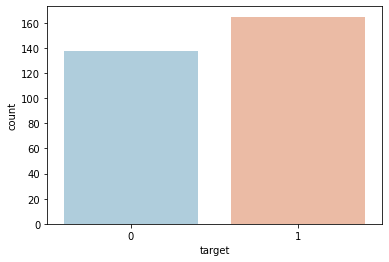

In [39]:
#EDA:-

sns.countplot(x="target", data=df, palette='RdBu_r',color=["red","green"])
plt.show()

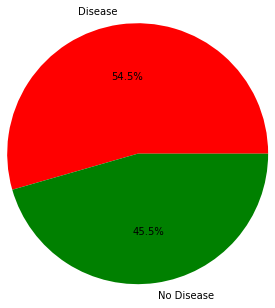

In [40]:
# For Better Visual representation:-

plt.pie(df['target'].value_counts(), labels=['Disease','No Disease'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

In [41]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

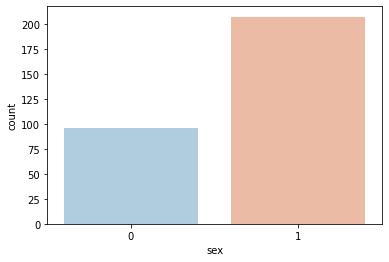

In [43]:
sns.countplot(x="sex", data=df, palette='RdBu_r')
plt.show()

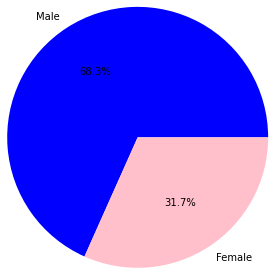

In [45]:
# For Better Visual representation:-

plt.pie(df['sex'].value_counts(), labels=['Male','Female'], colors=['blue','pink'], autopct='%1.1f%%',radius=1.5)
plt.show()

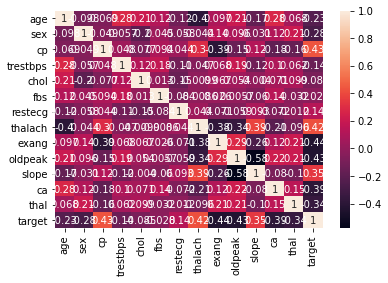

In [46]:
# To check the correlation with the help of Heatmap:-

sns.heatmap(df.corr(), annot =True)
plt.show()

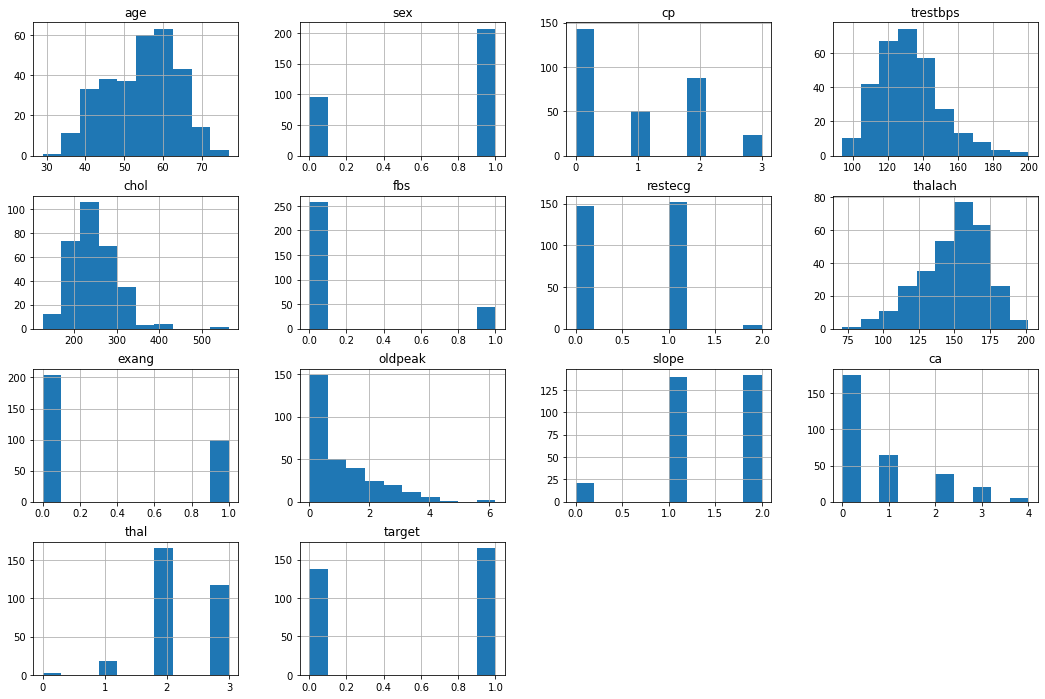

In [47]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

# Separation of X and Y.

In [20]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [51]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [52]:
mymodel(logreg)

Accuracy :- 0.8421052631578947
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

[[24  9]
 [ 3 40]]


LogisticRegression()

In [53]:
mymodel(knn)

Accuracy :- 0.6447368421052632
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.67      0.72      0.70        43

    accuracy                           0.64        76
   macro avg       0.64      0.63      0.63        76
weighted avg       0.64      0.64      0.64        76

[[18 15]
 [12 31]]


KNeighborsClassifier()

In [54]:
mymodel(svc)

Accuracy :- 0.6842105263157895
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.67      0.86      0.76        43

    accuracy                           0.68        76
   macro avg       0.69      0.66      0.66        76
weighted avg       0.69      0.68      0.67        76

[[15 18]
 [ 6 37]]


SVC()

In [55]:
mymodel(dtc)

Accuracy :- 0.7894736842105263
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

[[25  8]
 [ 8 35]]


DecisionTreeClassifier()

In [56]:
mymodel(rfc)

Accuracy :- 0.8157894736842105
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

[[24  9]
 [ 5 38]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Heart DataSet is Logistic Regression And Decision Tree Classifier OR Random Forest Classifier have same accuracy.

. BEST SCORES 
-  LOGISTIC REGRESSION HAVE 84% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 79% OF ACCURACY.
-  RANDOM FOREST CLASSIFIER HAVE 82% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 68% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 64% OF ACCURACY.

# Conclusion

- Exercise induced angina, Chest pain is major symptoms of heart attack.
- Logistic Regression default model Have best accuracy among all other models.